In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('HousingData.csv')

In [14]:
missing_values = df.isnull().sum()
    
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df = df_imputed

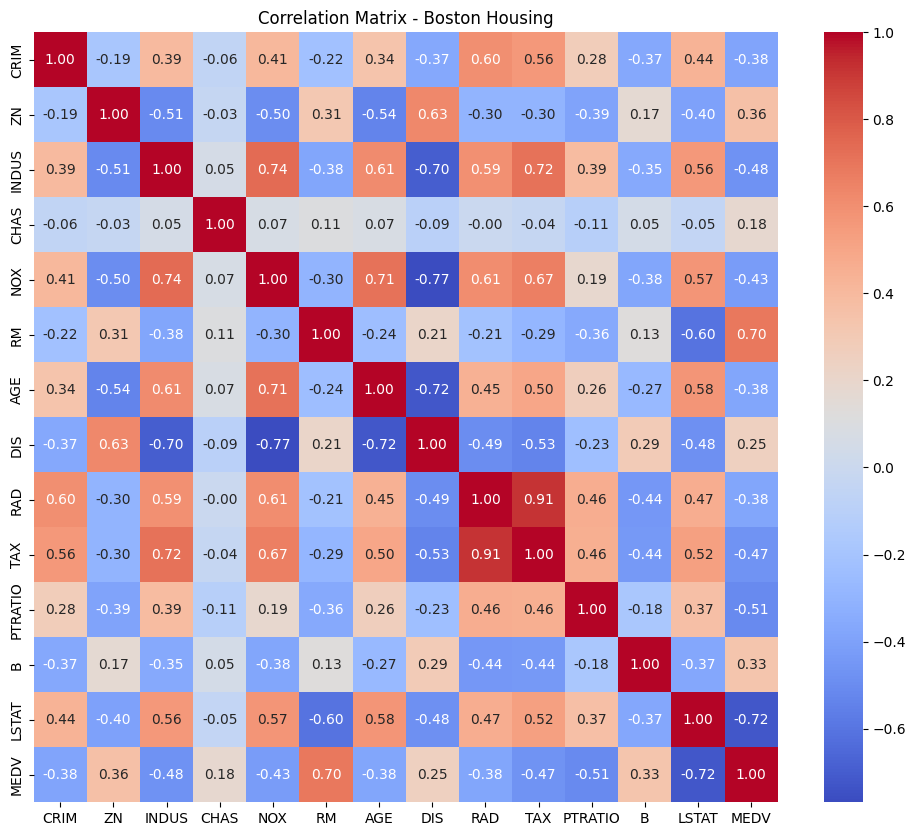

In [15]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix - Boston Housing")
plt.show()

In [16]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"RMSE {rmse_test:.2f}")
print(f"R² {r2_test:.2f}")

RMSE 5.00
R² 0.66


In [17]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(importance)

    Feature  Coefficient
5        RM     3.342439
7       DIS    -3.206119
12    LSTAT    -3.090931
10  PTRATIO    -1.981109
4       NOX    -1.878393
8       RAD     1.872101
9       TAX    -1.502738
11        B     1.100450
0      CRIM    -0.993472
3      CHAS     0.832908
1        ZN     0.648245
6       AGE    -0.496382
2     INDUS    -0.171919


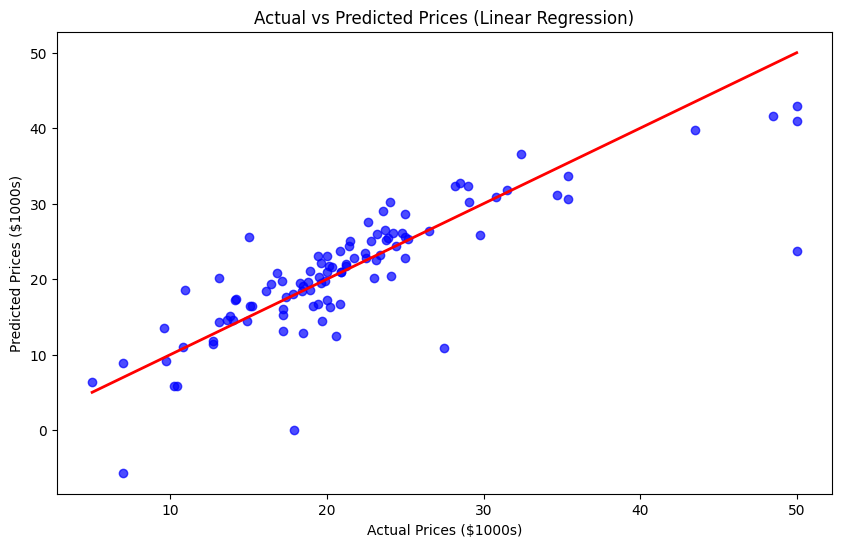

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.xlabel("Actual Prices ($1000s)")
plt.ylabel("Predicted Prices ($1000s)")
plt.title("Actual vs Predicted Prices (Linear Regression)")
plt.show()

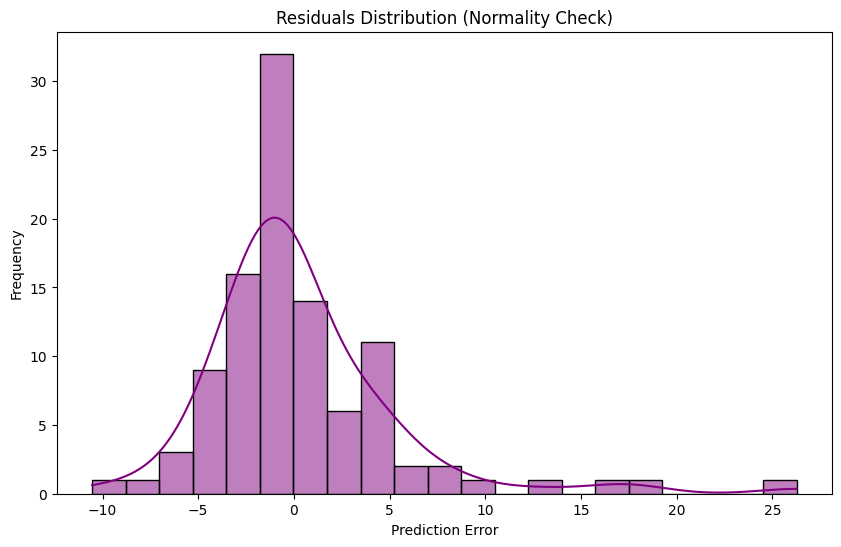

In [19]:
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='purple')
plt.title("Residuals Distribution (Normality Check)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.show()